<a name="part0000"></a>
<!-- ------------------- main content ---------------------- -->



<div class="jumbotron">
<center><h1>Second week</h1></center>  <!-- document title -->

<p>
<!-- author(s): Data Analysis and Machine Learning -->

<center>
<b>Data Analysis and Machine Learning</b> 
</center>

<p>
<!-- institution(s) -->

<br>
<p>
<center><h4>May 29, 2020</h4></center> <!-- date -->
<br>
<p>
</div> <!-- end jumbotron -->

<h2 id="___sec0" class="anchor">Regression examples, from linear regression, via decision trees and various forests to neural networks  </h2>

<p>
The main aim of this project is to study some specific 
regression problems, starting with the regression algorithms studied
in homework set 3 (exercise 2 in particular).
We will include decision trees, random forests and eventually boosting
methods  and neural network with <b>tensorflow</b> (feel free however to write your own code).

<p>
The case we encounter here
is  the so-called Ising model for  our training data and we will
focus on supervised training. We will follow closely the recent
article of <a href="https://arxiv.org/abs/1803.08823" target="_self">Mehta et al, arXiv
1803.08823</a>. This article stands
out as an excellent review on machine learning (ML) algorithms.
The added benefit is that each figure and
model presented in <a href="https://physics.bu.edu/~pankajm/MLnotebooks.html" target="_self">this article is accompanied by its jupyter
notebook</a>. This
means that we can start using these and compare with our own results.

<p>
You can also look up the <a href="https://compphysics.github.io/MachineLearningMSU-FRIB2020/doc/pub/Regression/html/Regression.html" target="_self">Regression slides for a discussion of the Ising model</a> (scroll down to the end).

<p>
Alternatively, you can replace the Ising thorughout the exercises with the nuclear binding energies. The choice is yours. Or if you have other data sets suitable for regression, feel free to use those.

<p>
What follows here is however a discussion of the Ising model. The nuclear binding energies were discussed during the lectures.

<p>
With the abovementioned configurations we will determine, using first
various regression methods, the value of the coupling constant for the
energy of the one-dimensional Ising model.
We will mainly use <b>scikit-learn</b> or <b>tensorflow</b> or other Python packages such as <b>keras</b> or other.

<p>
Feel free to use the notebooks to benchmark your code.

<h3 id="___sec1" class="anchor">Part a): Producing the data for the one-dimensional Ising model </h3>

<p>
The model we will employ in our studies is the so-called <a href="https://en.wikipedia.org/wiki/Ising_model" target="_self">Ising
model</a>.  Together with
models like the <a href="https://en.wikipedia.org/wiki/Potts_model" target="_self">Potts
model</a> and similar
so-called lattice models, the Ising model has been widely studied in
mathematics (in statistics in particular), physics, <a href="https://journals.aps.org/pre/abstract/10.1103/PhysRevE.93.062402" target="_self">life
science</a>,
chemistry and even in the <a href="https://www.springer.com/gp/book/9781461420316" target="_self">social sciences in order to model social
behavior</a>. It is a
simple binary value system where the variables of the model (spins often in
physics) can take two values only, for example \( \pm 1 \) or \( 0 \) and \( 1 \).
The system exhibits a phase transition in two or higher dimensions and
the first person to find the analytical expressions for various
expectation values was the Norwegian chemist <a href="https://en.wikipedia.org/wiki/Lars_Onsager" target="_self">Lars
Onsager</a> (Nobel prize in
chemistry) after a tour de force mathematics exercise.

<p>
In our discussions here we will stay with a physicist's approach and
call the variables for spin. You could replace this with any other
type of binary variables, ranging from a two political parties to blue
and red spheres.  In its simplest form we define the energy of the
system as

$$
\begin{equation*}
  E=-J\sum_{< kl>}^{N}s_ks_l,
\end{equation*}
$$

with  \( s_k=\pm 1 \), \( N \) is the total number of spins,
\( J \) is a coupling constant expressing the strength of the interaction
between neighboring spins.

<p>
The symbol \( < kl> \) indicates that we sum over nearest
neighbors only.
Notice that for \( J>0 \) it is energetically favorable for neighboring spins
to be aligned. This feature leads to, at low enough temperatures,
a cooperative phenomenon called spontaneous magnetization. That is,
through interactions between nearest neighbors, a given magnetic
moment can influence the alignment of spins  that are separated
from the given spin by a macroscopic distance. These long range correlations
between spins are associated with a long-range order in which
the lattice has a net magnetization in the absence of a magnetic field.

<p>
We start by considering the one-dimensional Ising model with nearest neighbor interactions. This model does not exhibit any phase transition.

<p>
Consider the 1D Ising model with nearest-neighbor interactions 

$$
\begin{equation*}
  E[\hat{s}]=-J\sum_{j=1}^{N}s_{j}s_{j+1},
\end{equation*}
$$

<p>
on a chain of length \( N \) with so-called periodic boundary conditions and \( S_j=\pm 1 \) Ising spin variables.
In one dimension, this model has no phase transition at finite temperature.

<p>
In the Python code below we generate, with a coupling coefficient set to \( J=1 \), a large number of spin configurations say \( 10000 \) as shown in the code below.
It means that our data will be a set of \( i=1\ldots n \) points of the form
\( \{(E[\boldsymbol{s}^i],\boldsymbol{s}^i)\} \).
Our task is to find the value of \( J \) from the data set using linear regression.

<p>
Here is the Python code you need to generate the training data, see
also the <a href="https://physics.bu.edu/~pankajm/ML-Notebooks/HTML/NB_CVI-linreg_ising.html" target="_self">notebook of Mehta et
al</a>.

In [1]:
import numpy as np
import scipy.sparse as sp
np.random.seed(12)

import warnings
#Comment this to turn on warnings
warnings.filterwarnings('ignore')

### define Ising model aprams
# system size
L=40

# create 10000 random Ising states
states=np.random.choice([-1, 1], size=(10000,L))

def ising_energies(states,L):
    """
    This function calculates the energies of the states in the nn Ising Hamiltonian
    """
    J=np.zeros((L,L),)
    for i in range(L):
        J[i,(i+1)%L]-=1.0
    # compute energies
    E = np.einsum('...i,ij,...j->...',states,J,states)

    return E
# calculate Ising energies
energies=ising_energies(states,L)

In [2]:
states.shape, states

((10000, 40),
 array([[ 1,  1, -1, ..., -1, -1, -1],
        [-1, -1,  1, ..., -1, -1, -1],
        [-1,  1,  1, ..., -1, -1,  1],
        ...,
        [-1,  1, -1, ..., -1, -1,  1],
        [ 1, -1, -1, ...,  1, -1,  1],
        [-1, -1,  1, ..., -1,  1, -1]]))

In [3]:
energies.shape, energies

((10000,), array([  4., -12.,   4., ...,   0.,  -8.,   8.]))

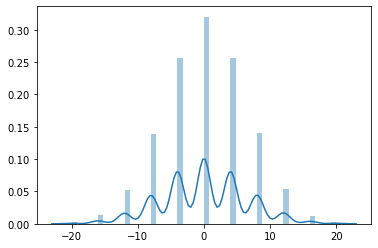

In [4]:
import seaborn as sns
sns.distplot(energies);

<p>
We can now recast the problem as a linear regression model using our codes from homework set 3 (exercise 2 in particular).
The way we are going to build our model mimicks the way we could think of finding say the gravitional constant for the graviational force between two planets.
In the absence of any prior knowledge, one sensible choice is the all-to-all Ising model

$$
E_\mathrm{model}[\boldsymbol{s}^i] = - \sum_{j=1}^N \sum_{k=1}^N J_{j,k}s_{j}^is_{k}^i.
$$

<p>
Here \( i \) represents a particular spin configuration (one of the possible \( n \) configurations we generated with the code above).

<p>
This model is uniquely defined by the non-local coupling strengths \( J_{jk} \) which we want to learn.
The model is linear in \( \mathbf{J} \) which makes it possible to use linear regression.

<p>
To apply linear regression, we recast this model in the form
$$
E_\mathrm{model}^i \equiv \mathbf{X}^i \cdot \mathbf{J},
$$

<p>
where the vectors \( \mathbf{X}^i \) represent all two-body interactions
\( \{s_{j}^is_{k}^i \}_{j,k=1}^N \), and the index \( i \) runs over the
samples in the data set.  To make the analogy complete, we can also
represent the dot product by a single index \( p = \{j,k\} \),
i.e. \( \mathbf{X}^i \cdot \mathbf{J}=X^i_pJ_p \).  Note that the
regression model does not include the minus sign, so we expect to
learn negative \( J \)'s.

<h3 id="___sec2" class="anchor">Part b): Estimating the coupling constant of the one-dimensional Ising model using linear regression </h3>

<p>
We start with the one-dimensional Ising model and use the data we have
generated with \( J=1 \) in the previous point.

<p>
<b>Use linear regression,
Lasso and Ridge regression as done in homework 3</b>.
Make an analysis of the guessed coupling constant as function of the hyperparameters \( \lambda \). 
You can compare your
results with those of <a href="https://physics.bu.edu/~pankajm/ML-Notebooks/HTML/NB_CVI-linreg_ising.html" target="_self">Mehta
et al.</a>.
Make sure it is the 1D data which is used.

<p>
Discuss the methods and how they perform in computing the coupling
constant \( J \) and include a bias-variance analysis using the bootstrap resampling method.
Discuss also the mean squared error and
the \( R2 \) score as measures to assess your model.

<p>
Give a critical analysis of your results.

$$\mathbf{X^{i}} = [s_1, s_2, ..., s_{N^2}]$$ 
$$\mathbf{J} = [J_1, J_2, ..., J_{N^2}]^T$$ 

Where subscript is $p = {j, k}$

This brings us to how the design matrix is going to be created:

In [5]:
energies.shape, states.shape

((10000,), (10000, 40))

In [6]:
J_test = np.ones((L, 1))

In [7]:
X_test = states[0][np.newaxis, :]

In [8]:
J_test.shape, X_test.shape

((40, 1), (1, 40))

In [9]:
X_test @ J_test

array([[-2.]])

<p>
You can replace the Ising model data with the nuclear binding energy data.

<h3 id="___sec3" class="anchor">Part c): Random forests and boosting  </h3>

<p>
Repeat the above analysis but using random forests and boosting (XGboost or normal gradient boosting). You can use the functions
in <b>scikit-learn</b> for random forests and gradient boosting. For <b>XGBoost</b> you need to install it separately. You can still use other functionality in <b>scikit-Learn</b>.

<h3 id="___sec4" class="anchor">Part d): Regression analysis of the one-dimensional Ising model using neural networks  </h3>

<p>
Your aim now is to use either <b>scikit-learn</b> or <b>tensorflow</b> in order to set up a neural network to find the optimal weights and biases.

<p>
Train your network and compare the results with those from your linear regression code and random forests/boosting methods.

<p>
You can test your results against a similar code using <b>scikit-learn</b> or <b>tensorflow/keras</b>.

<p>
A useful reference on the back progagation algorithm is <a href="http://neuralnetworksanddeeplearning.com/" target="_self">Nielsen's book</a>. It is an excellent read.

<p>
Finally, give a critical analysis of your results with pros and cons of the various methods.

<h2 id="___sec5" class="anchor">Checklist for handling data, Machine Learning cheat sheet </h2>

<p>
This is a short cheat sheet for doing machine learning
experiments. It'll discuss data exploration the modelling pipeline and
model validation in short with links to external resources for
reference

<h3 id="___sec6" class="anchor">Data Exploration </h3>

<p>
When modelling with machine learning it's easy to just present your
data to a model, while this has the odd chance of working more likely
this will give you a very weak model.

<p>
The first step of the machine learning process is then to look at your
data, and your chosen representation of the data.

<h3 id="___sec7" class="anchor">Visualization </h3>

<p>
Depending on your data, if it's sequential, real-continious or image
based your data should be visualized to get a reference for the
distribution of data. In particular for representations of continious
or discreet variables visualizing ditributions can be hugely helpful
to determining the style of normalization to apply. In short: look at
your data.

<h3 id="___sec8" class="anchor">Normalizing </h3>

<p>
After inspecting your data distribution(s) you should consider what
standardization techniques to apply. In particular you need to think
about if you need the covariance matrix of your data to be unchanged
under the normalization. Mean centering doesn't change your covariance
matrix, standardization of the variance does.

<p>
Also consider if your features are on the same scale. Your model might
be in trouble if one feature is on the order \( ~10^0 \) and a second is
on the order \( ~10^3 \).

<h3 id="___sec9" class="anchor">Prototyping </h3>

<p>
It's likely that the first version of your chosen model, or even that
the model type or representation might provide unsuitable for the
problem at hand. A fundamental part of the process then is exploring
representations, and model types that might be suitable. The <code>keras</code>
API and <code>scikit-learn</code> off-the-shelf algorithms are fantastic for this
purpose.

<p>
Remember to keep your model assumptions in mind
The following links are useful <a href="https://sebastianraschka.com/Articles/2014_about_feature_scaling.html" target="_self"><tt>https://sebastianraschka.com/Articles/2014_about_feature_scaling.html</tt></a> and  <a href="https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e" target="_self"><tt>https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e</tt></a>

<h3 id="___sec10" class="anchor">Model Validation </h3>

<p>
For a regression problem, supervised classification or unsupervised
classification with a set of ground truth labels it is absolutely
necessary to split your data in disjoint sets for training and testing
prior to any processing. The processing variables should be
established from the training set and applied to test and
training. This is to estimate if your normalization is sane for
"unseen" data.

<h3 id="___sec11" class="anchor">Hyperparameter tuning  </h3>

<p>
For almost all interesting problems the computational cost of running
a gridsearch to find the optimal configuration for the hyperparameters
is not feasible, both because it is expensive, but the loss-surface
might be glassy excepting one very narrow spike your grid doesn't
hit. There are many sophisticated tools for the job, but for most
cases the tool for the job has shown to be simple random search. Run N
experiments with random hyperparameter configurations and pick the
best performing on the validation set.

<h3 id="___sec12" class="anchor">Performance estimation </h3>

<p>
For estimating your models performance the tool depends on your
application. For regression the \( R^2 \) coefficient (explained variance)
is commonly used, and for linear regression models you usually want an
estimate of coefficient significance (<code>scipy statsmodels</code> is a python
package good for this). For estimating significance and impact you
should have a clear image of the degree of multi-colinearity in your
data (does your design matrix have full rank?). For non-linear models
of 1d vectors (not sequence or image models) estimating feature
importance (the impact of removing one feature on model
performance). For image data and convolutional nets visualizing the
max activation of the filters is a good way to estimate what your
model is doing.

<p>
For classification there usually is a tradeoff between number of true
and false positives. The f1-score (or depending on your model you
might favor precision over recall or vice versa which would need an
adjusted f-score) is a good single number-measure. Plotting the ROC
(reciever-operator characteristic) curve and estimating it's area
under the curve (analogous to accuracy). These curves are plotted
per-class basis, and then you can average over them to produce an
aggregate performance.

<p>
You should also use some statsitical measure for model
validation. \( k \)-fold cross validation is recommended for most cases.

<p>
In essence: what the goal of all this is to be able to estimate the
generalization performance. The training set is used to estimate the
optimal parameters and hyperparameters as well as the distribution of
performance under these. For each hyperparameter search you use the
test set to make a final estimation of your generalization
performance, going back and adjusting parameters based on test
performance strongly reduces your certainty of generalization and is
strongly discouraged.

<p>
Scikit-learn has many off-the shelf measures for model performance and validation, with examples.  The following blogs on this may be of interest
<a href="https://towardsdatascience.com/hyper-parameter-tuning-techniques-in-deep-learning-4dad592c63c8" target="_self"><tt>https://towardsdatascience.com/hyper-parameter-tuning-techniques-in-deep-learning-4dad592c63c8</tt></a> and 
<a href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py" target="_self"><tt>https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py</tt></a>

<h2 id="___sec13" class="anchor">Background literature </h2>

<ol>
<li> The text of Michael Nielsen is highly recommended, see <a href="http://neuralnetworksanddeeplearning.com/" target="_self">Nielsen's book</a>. It is an excellent read.</li>
<li> The textbook of <a href="https://www.springer.com/gp/book/9780387848570" target="_self">Trevor Hastie, Robert Tibshirani, Jerome H. Friedman, The Elements of Statistical Learning, Springer</a>, chapters 3 and 7 are the most relevant ones for the analysis here.</li> 
<li> <a href="https://arxiv.org/abs/1803.08823" target="_self">Mehta et al, arXiv 1803.08823</a>, <em>A high-bias, low-variance introduction to Machine Learning for physicists</em>, ArXiv:1803.08823.</li>
</ol>

If you wish to read more about the Ising model and statistical physics here are three suggestions.

<ol>
<li> <a href="http://www.worldscientific.com/worldscibooks/10.1142/5660" target="_self">M. Plischke and B. Bergersen</a>, <em>Equilibrium Statistical Physics</em>, World Scientific, see chapters 5 and 6.</li>
<li> <a href="http://www.cambridge.org/no/academic/subjects/physics/computational-science-and-modelling/guide-monte-carlo-simulations-statistical-physics-4th-edition?format=HB" target="_self">D. P. Landau and K. Binder</a>, <em>A Guide to Monte Carlo Simulations in Statistical Physics</em>, Cambridge, see chapters 2,3 and 4.</li>
<li> <a href="https://global.oup.com/academic/product/monte-carlo-methods-in-statistical-physics-9780198517979?cc=no&lang=en&" target="_self">M. E. J. Newman and T. Barkema</a>, <em>Monte Carlo Methods in Statistical Physics</em>, Oxford, see chapters 3 and 4.</li>
</ol>


<p>
<!-- navigation buttons at the bottom of the page -->
<ul class="pagination">
  <li class="active"><a href="._hw4-bs000.html">1</a></li>
</ul>
<!-- ------------------- end of main content --------------- -->

</div>  <!-- end container -->
<!-- include javascript, jQuery *first* -->
<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.10.2/jquery.min.js"></script>
<script src="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/js/bootstrap.min.js"></script>

<!-- Bootstrap footer
<footer>
<a href="http://..."><img width="250" align=right src="http://..."></a>
</footer>
-->


</body>
</html>
    